   Unnamed: 0  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0           0   0  18393       1     168    62.0    110     80            0   
1           1   1  20228       0     156    85.0    140     90            2   
2           2   2  18857       0     165    64.0    130     70            2   
3           3   3  17623       1     169    82.0    150    100            0   
4           4   4  17474       0     156    56.0    100     60            0   

   gluc  smoke  alco  active  cardio  
0     0      0     0       1       0  
1     0      0     0       1       1  
2     0      0     0       0       1  
3     0      0     0       1       1  
4     0      0     0       0       0  
Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
Logistic Regression - Confusion Matrix:


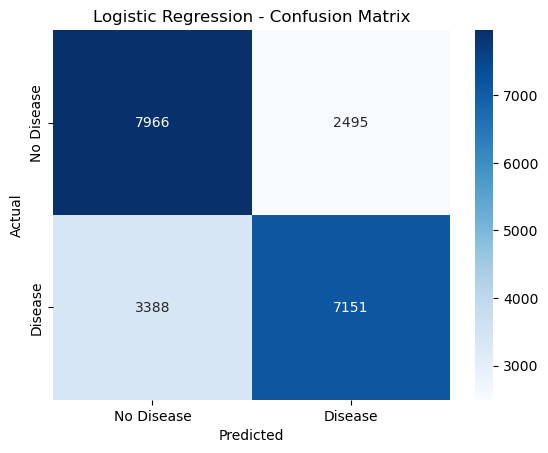

Random Forest - Confusion Matrix:
[[7946 2515]
 [3173 7366]]
Random Forest - Accuracy: 0.73
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74     10461
           1       0.75      0.70      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



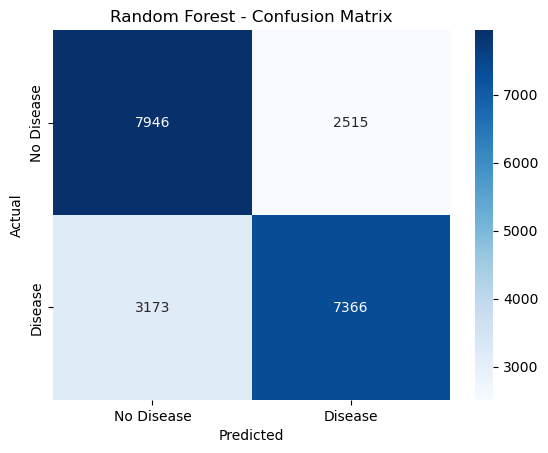

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.735 total time=   7.1s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.729 total time=   7.9s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.734 total time=   7.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.729 total time=   8.5s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.733 total time=   6.8s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.734 total time=  12.1s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.730 total time=  11.6s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.733 total time=  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (replace 'cardio_dataset.csv' with the path to your dataset)
df = pd.read_csv('C:/Users/festu/Downloads/Cardiovascular (2).csv')

# View basic information about the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or handle as necessary)
df.dropna(inplace=True)

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['cardio'])  # Assuming 'cardio' is the target column
y = df['cardio']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_logistic)
print(f"Logistic Regression - Accuracy: {accuracy_logistic:.2f}")
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Visualize the confusion matrix for Logistic Regression
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest - Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualize the confusion matrix for Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Hyperparameter Tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, verbose=3)

# Fit the grid search to the data
grid_rf.fit(X_train, y_train)

# Best parameters and score for Random Forest
print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best Score from GridSearchCV (Random Forest):", grid_rf.best_score_)

# Use the best model from the grid search
best_rf_model = grid_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Tuned Random Forest - Confusion Matrix:")
print(conf_matrix_best_rf)
print(f"Tuned Random Forest - Accuracy: {accuracy_best_rf:.2f}")
print("Tuned Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Visualize the confusion matrix for the tuned Random Forest model
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Tuned Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
